<a href="https://colab.research.google.com/github/sudhanshu741/Credit-card-customer-churn-prediction/blob/main/Credit_card_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card customer churn prediction

In [68]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('/content/Churn_Modelling.csv', encoding='Latin')

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
df.duplicated().sum()

0

In [37]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [38]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [40]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df= pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [43]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [44]:
x=df.drop(columns=['Exited'])

y=df['Exited']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [46]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [47]:
X_train.shape

(8000, 11)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [49]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [50]:
X_test_scaled

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model=Sequential()
model.add(Dense(3, activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 11)                44        
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])


In [97]:
history=model.fit(X_train_scaled,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 3s 10ms/step - loss: 0.3917 - accuracy: 0.8391 - val_loss: 0.3992 - val_accuracy: 0.8325
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3919 - accuracy: 0.8400 - val_loss: 0.3988 - val_accuracy: 0.8331
Epoch 3/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3919 - accuracy: 0.8386 - val_loss: 0.3980 - val_accuracy: 0.8331
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3916 - accuracy: 0.8403 - val_loss: 0.3983 - val_accuracy: 0.8331
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3909 - accuracy: 0.8378 - val_loss: 0.4008 - val_accuracy: 0.8338
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3919 - accuracy: 0.8394 - val_loss: 0.3990 - val_accuracy: 0.8331
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3916 - accuracy: 0.8397 - val_loss: 0.3986 - val_accuracy: 0.8331
Epoch

In [98]:
model.layers[0].get_weights()

[array([[-0.00674818,  0.0590186 ,  0.00557348],
        [ 0.46002087, -0.93240476, -0.31096885],
        [ 0.05504985,  0.00394066, -0.04118848],
        [-0.02188897,  0.16082396,  0.72681403],
        [ 0.05674568,  0.24653858,  0.7401151 ],
        [ 0.08951828, -0.02342248,  0.00367956],
        [ 0.95527315, -0.32194   ,  0.08241602],
        [-0.01119142,  0.0051877 ,  0.0607224 ],
        [ 0.199381  , -0.01330511,  0.7000815 ],
        [ 0.1623426 , -0.11328962, -0.05027192],
        [ 0.06922767,  0.09831695, -0.0423209 ]], dtype=float32),
 array([0.91827387, 1.4817008 , 0.6982618 ], dtype=float32)]

In [77]:
model.layers[1].get_weights()

[array([[ 0.56621075,  0.2749536 , -0.08029699,  0.7214376 ,  0.6063994 ,
         -0.6528726 ,  0.20910904, -0.6715138 ,  0.21927899, -0.00402954,
          0.01336817],
        [ 0.7393858 ,  0.31720245,  0.85521024,  0.7737562 ,  0.15768726,
         -0.12879884,  0.35194814,  0.18818374,  0.52758837, -0.48334157,
          0.42049298],
        [-0.8839356 ,  0.11718684,  0.1462937 ,  0.3428096 ,  0.03178078,
         -0.26275602,  0.26483127,  0.74381655,  0.7811273 ,  0.02562034,
          0.24599062]], dtype=float32),
 array([-0.3806241 , -0.8125449 ,  0.00282061, -0.32434934, -0.3025157 ,
         0.        , -0.15475135, -0.45057952, -0.16993332, -0.07772958,
        -0.91338956], dtype=float32)]

In [82]:
model.layers[2].get_weights()

[array([[-0.93964565],
        [ 1.2264777 ],
        [-0.9685603 ],
        [-0.40404496],
        [-0.80309206],
        [-0.01372826],
        [-0.9544324 ],
        [ 0.5135691 ],
        [-0.26518562],
        [ 0.00541087],
        [ 1.5305613 ]], dtype=float32),
 array([1.7690034], dtype=float32)]

In [83]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [84]:
y_pred=np.where(y_log>0.5,1,0)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.839

In [91]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'loss': [0.39347389340400696,
  0.39316099882125854,
  0.39345675706863403,
  0.3932587802410126,
  0.3935965597629547,
  0.3936280310153961,
  0.39318931102752686,
  0.3933301568031311,
  0.39350345730781555,
  0.3935266137123108,
  0.39300253987312317,
  0.39305561780929565,
  0.3931243419647217,
  0.3934662342071533,
  0.39316463470458984,
  0.39299240708351135,
  0.39292100071907043,
  0.3927712142467499,
  0.3934033215045929,
  0.3932548463344574,
  0.393174409866333,
  0.3929247558116913,
  0.3926559090614319,
  0.393057256937027,
  0.3923788070678711,
  0.39315614104270935,
  0.3926139175891876,
  0.39275071024894714,
  0.3931536078453064,
  0.39259761571884155,
  0.39283451437950134,
  0.39253681898117065,
  0.39253702759742737,
  0.39251166582107544,
  0.39211609959602356,
  0.3928905129432678,
  0.3924214839935303,
  0.39228424429893494,
  0.39258724451065063,
  0.3924606740474701,
  0.3923610746860504,
  0.39234501123428345,
  0.3924529254436493,
  0.3920840322971344,
  0.3

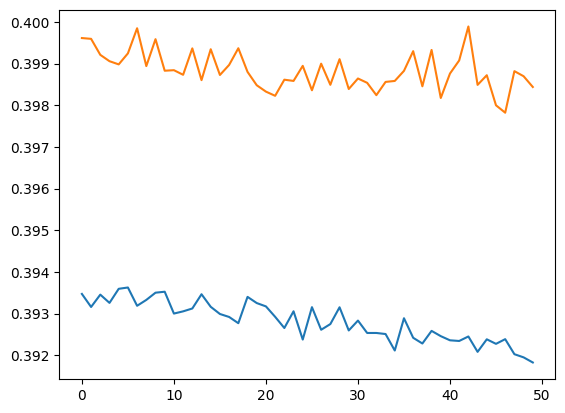

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

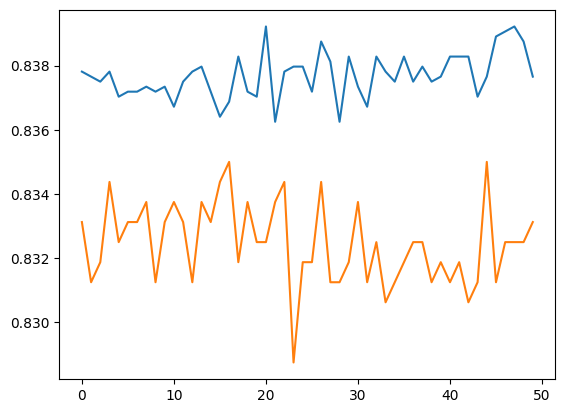

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])